# ST445: Managing and Visualizing Data

## Matplotlib Primer: Scatter and Time Series Plots

### Milan Vojnovic and Christine Yuen, MT 2017
---

## Preparation

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

## Table

In [2]:
macro = pd.read_csv('macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


## Scatter plot

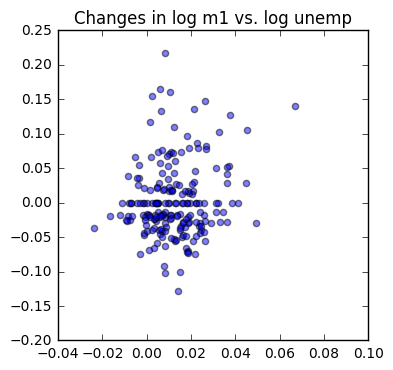

In [3]:
plt.figure(figsize=(4,4))
plt.scatter(trans_data['m1'], trans_data['unemp'], alpha=0.5)
plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp'))

### Scatter plot matrix

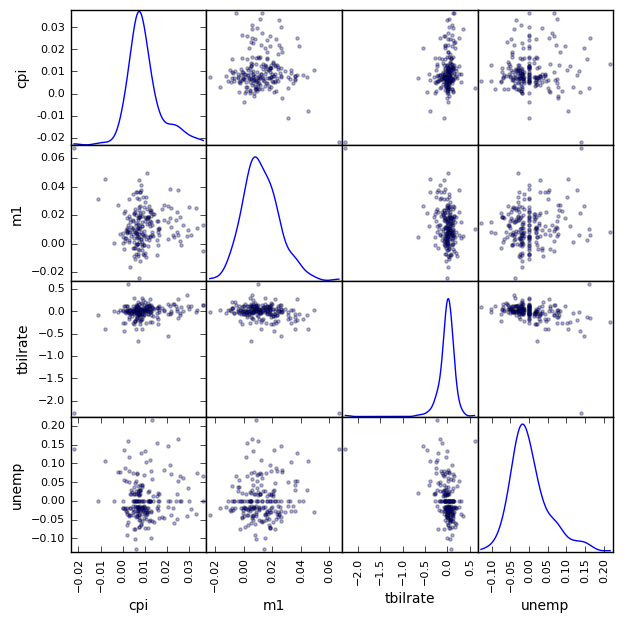

In [4]:
pd.scatter_matrix(trans_data, alpha=0.3, diagonal='kde', figsize=(7,7)); 

## Autocorrelation plot

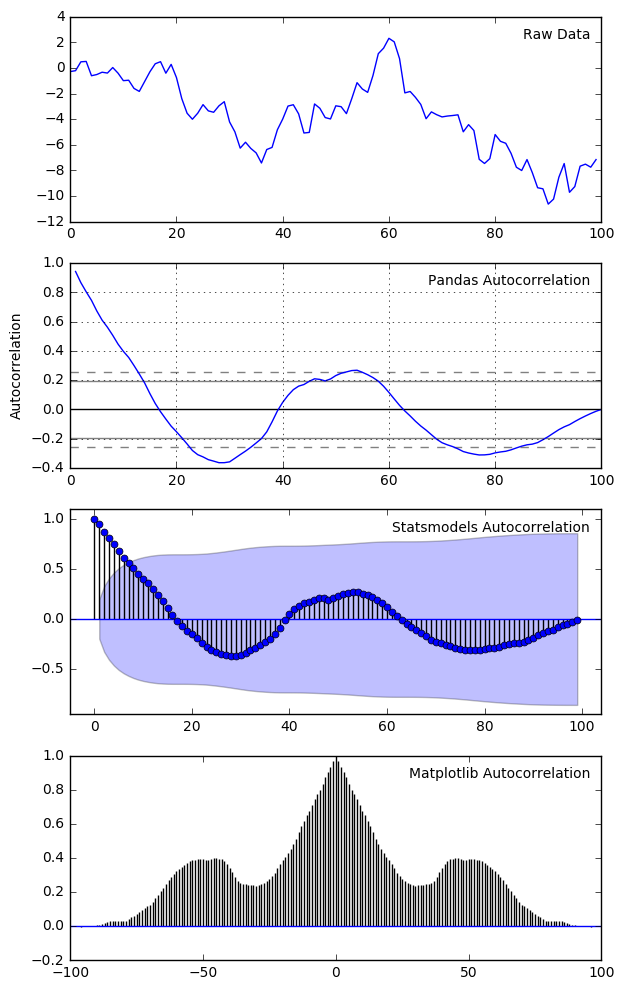

In [5]:
# generate random data
np.random.seed(1977)
data = np.random.normal(0, 1, 100).cumsum()

from statsmodels.graphics import tsaplots

def label(ax, string):
    ax.annotate(string, (1, 1), xytext=(-8, -8), ha='right', va='top',
                size=10, xycoords='axes fraction', textcoords='offset points')

fig, axes = plt.subplots(nrows=4, figsize=(6, 10))
fig.tight_layout()

axes[0].plot(data)
label(axes[0], 'Raw Data')

pd.tools.plotting.autocorrelation_plot(data, ax=axes[1])
label(axes[1], 'Pandas Autocorrelation')

tsaplots.plot_acf(data, axes[2])
label(axes[2], 'Statsmodels Autocorrelation')

axes[3].acorr(data, maxlags=data.size-1)
label(axes[3], 'Matplotlib Autocorrelation')

# Remove some of the titles and labels that were automatically added
for ax in axes.flat:
    ax.set(title='', xlabel='')
    
plt.show();

## Time series with a rolling average and a stardard deviation band

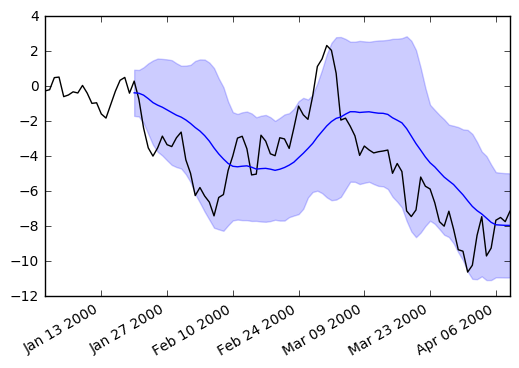

In [6]:
# covert data into series
price = pd.Series(data, index=pd.date_range('2000-1-1', periods=len(data), freq='D'))

# calculate the rolling mean and standard deviation
ma = price.rolling(20).mean()
mstd = price.rolling(20).std()

plt.figure()
plt.plot(price.index, price, 'k')
plt.plot(ma.index, ma, 'b') # rolling mean
plt.fill_between(mstd.index, ma-2*mstd, ma+2*mstd, color='b', alpha=0.2) #std band
plt.gcf().autofmt_xdate()